In [745]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")

In [746]:
df = pd.read_csv(r'C:\Users\joao-\Desktop\Python\LaptopSales.csv')

In [747]:
df.Date.head()
df['Date'] = df.Date.str.slice(0,10,1)
df['Date'] = df.Date.str.replace('/','-')
df['Date'] = df.Date.str.replace(' ','')
df['Date'] = df['Date'].loc[df.Date.str.len() >=9]
df.Date.dropna(inplace=True)
data = df['Date']
df['Date'] = pd.to_datetime(df['Date'],format='%m-%d-%Y')
df.dropna(inplace=True)

In [748]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283786 entries, 0 to 297571
Data columns (total 16 columns):
Date                      283786 non-null datetime64[ns]
Configuration             283786 non-null int64
Customer Postcode         283786 non-null object
Store Postcode            283786 non-null object
Retail Price              283786 non-null float64
Screen Size (Inches)      283786 non-null int64
Battery Life (Hours)      283786 non-null int64
RAM (GB)                  283786 non-null int64
Processor Speeds (GHz)    283786 non-null float64
Integrated Wireless?      283786 non-null object
HD Size (GB)              283786 non-null int64
Bundled Applications?     283786 non-null object
customer X                283786 non-null int64
customer Y                283786 non-null int64
store X                   283786 non-null float64
store Y                   283786 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(7), object(4)
memory usage: 36.8+ MB


In [749]:
df.set_index('Date',inplace=True)
df.sort_index(inplace=True)

In [750]:
df.head()

,Configuration,Customer Postcode,Store Postcode,Retail Price,Screen Size (Inches),Battery Life (Hours),RAM (GB),Processor Speeds (GHz),Integrated Wireless?,HD Size (GB),Bundled Applications?,customer X,customer Y,store X,store Y
Date,,,,,,,,,,,,,,,
2008-01-01,1,E1 6NU,E2 0RY,370.0,15,4,1,1.5,Yes,40,Yes,533579,182085,535652.0,182961.0
2008-01-01,176,W1H 1DG,SW1V 4QQ,465.0,15,5,1,2.0,No,300,No,527601,181753,528924.0,178440.0
2008-01-01,176,NW6 7JR,W10 6HQ,465.0,15,5,1,2.0,No,300,No,524885,184280,524190.0,181567.0
2008-01-01,175,SE19 2EZ,SW12 9HD,515.0,15,5,1,2.0,No,300,Yes,533543,170496,528739.0,173080.0
2008-01-01,175,E14 9NS,SE1 2BN,515.0,15,5,1,2.0,No,300,Yes,538388,180046,534057.0,179682.0


In [751]:
a = df[df['customer X'] == 533579]
a[['customer X','customer Y','store X','store Y']].nunique()
#customer X e Y são equivalentes, o mesmo vale para store X e Y

customer X    1
customer Y    1
store X       3
store Y       3
dtype: int64

In [752]:
b = df[df['Customer Postcode'] == 'E1 6NU']
b[b['Store Postcode']=='E2 0RY']['store X'].unique()
#'Customer Postcode' é equivalente à 'customer X' e 'Store Postcode' é equivalente à 'store X'

array([535652.])

In [753]:
df.drop(['store Y','customer Y','Customer Postcode','Store Postcode'],axis=1,inplace=True)
#dropando colunas redundantes

In [754]:
df.sample(5).T

Date,2008-07-19,2008-10-21,2008-12-30,2008-06-29,2008-07-17
Configuration,287,278,712,94,802
Retail Price,690,600,532,460,610
Screen Size (Inches),15,15,17,15,17
Battery Life (Hours),5,5,5,4,6
RAM (GB),4,4,4,2,2
Processor Speeds (GHz),2.4,2.4,2.4,2.4,2.4
Integrated Wireless?,No,Yes,Yes,No,Yes
HD Size (GB),300,120,300,120,40
Bundled Applications?,Yes,No,No,No,No
customer X,525199,527659,530201,532386,544486


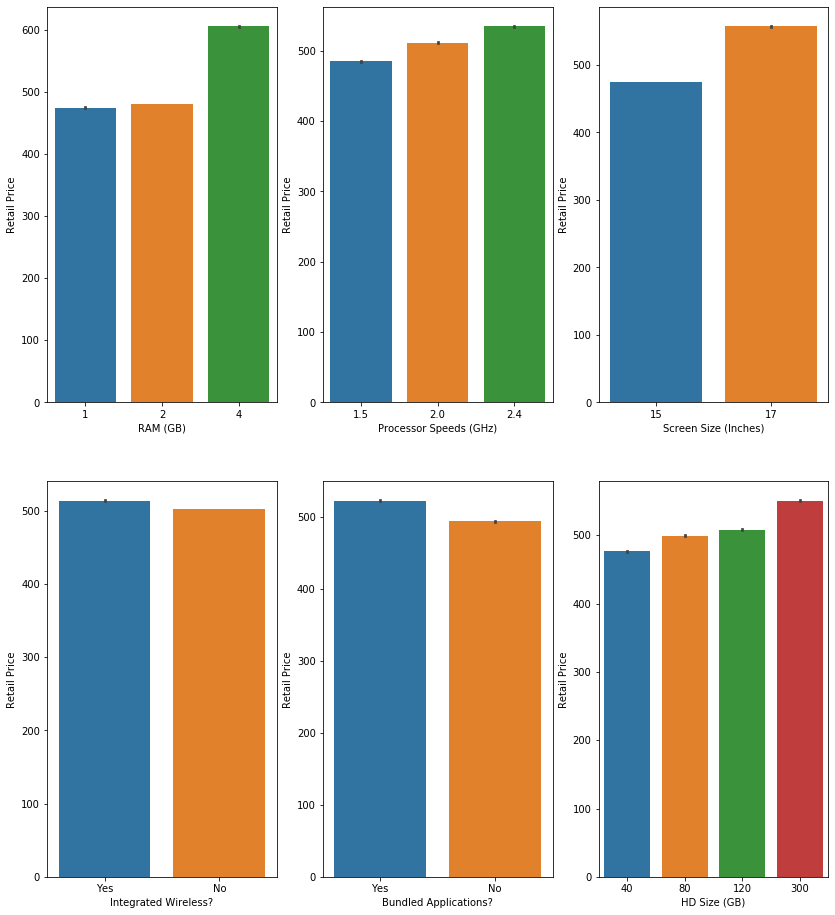

In [755]:
fig,ax = plt.subplots(2,3,figsize=(14,16))
sns.barplot('RAM (GB)','Retail Price',data=df,ax=ax[0,0])
sns.barplot('Processor Speeds (GHz)','Retail Price',data=df,ax=ax[0,1])
sns.barplot('Integrated Wireless?','Retail Price',data=df,ax=ax[1,0])
sns.barplot('Bundled Applications?','Retail Price',data=df,ax=ax[1,1])
sns.barplot('Screen Size (Inches)','Retail Price',data=df,ax=ax[0,2])
sns.barplot('HD Size (GB)','Retail Price',data=df,ax=ax[1,2])
plt.show()

In [756]:
gb1= df['Retail Price'][df['RAM (GB)']==1].mean()
gb2= df['Retail Price'][df['RAM (GB)']==2].mean()
gb4 = df['Retail Price'][df['RAM (GB)']==4].mean()
print(f'Laptops com 2GB de RAM custam apenas {round(((gb2/gb1)-1)*100,2)}% a mais dos com 1GB')
print(f'Laptops com 4GB de RAM custam apenas {round(((gb4/gb2)-1)*100,2)}% a mais dos com 2GB')

Laptops com 2GB de RAM custam apenas 1.29% a mais dos com 1GB
Laptops com 4GB de RAM custam apenas 26.02% a mais dos com 2GB


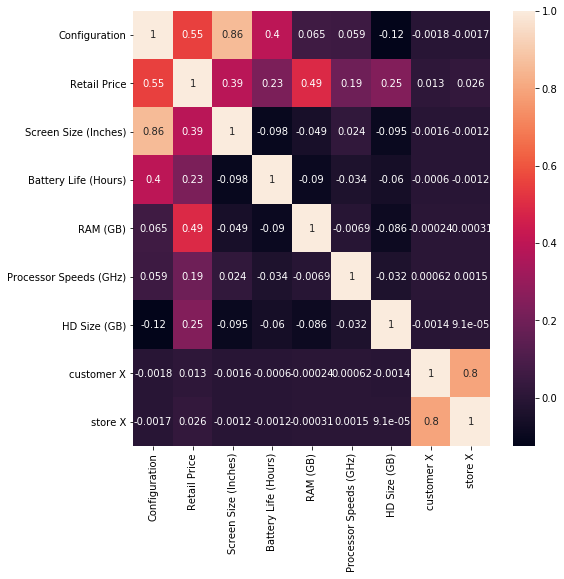

In [757]:
corr = df.corr()
fig,ax =plt.subplots(figsize=(8,8))
sns.heatmap(corr,annot=True,ax=ax)
plt.show()

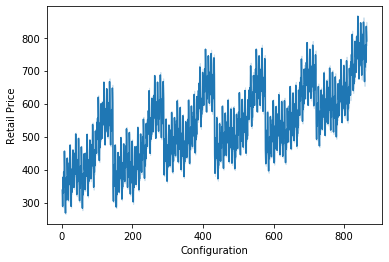

In [758]:
sns.lineplot('Configuration','Retail Price',data=df)
# nada conclusivo sobre a configuração

In [759]:
sales =[]
for i in range(1,13):
    sales.append(len(df[df.index.month == i]))
salesw= []
for j in range(1,53):
    salesw.append(len(df[df.index.week == j]))

Text(0.5, 1.0, 'Sales per Week')

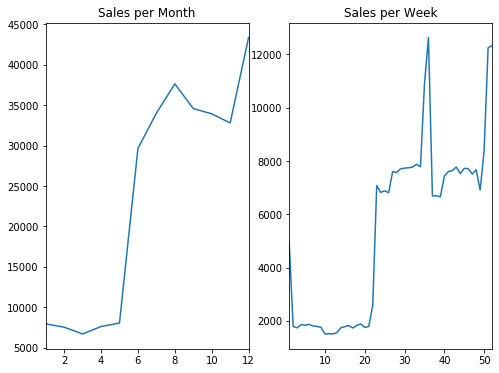

In [760]:
fig,ax= plt.subplots(1,2,figsize=(8,6))
sns.lineplot(range(1,13),sales,ax=ax[0])
ax[0].set_xlim(1,12)
sns.lineplot(range(1,53),salesw,ax= ax[1])
ax[1].set_xlim(1,52)
ax[0].set_title('Sales per Month')
ax[1].set_title('Sales per Week')

In [761]:
# Feature Engeneering
data = data.astype('object')
dates = data.unique().tolist()
total_sells = []
for i in dates:
    total_sells.append(len(df[df.index == i]))

In [762]:
dfv = pd.DataFrame(data = {'data':dates,'total_sells':total_sells})
dfv['data'] =  pd.to_datetime(dfv['data'])
dfv.set_index('data',inplace=True)
dfv.sort_index(inplace=True)

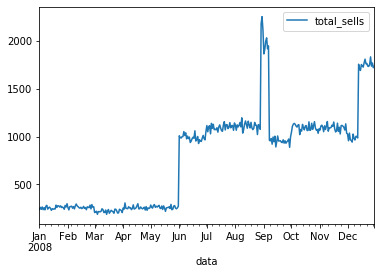

In [763]:
dfv.plot()

In [764]:
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pmd

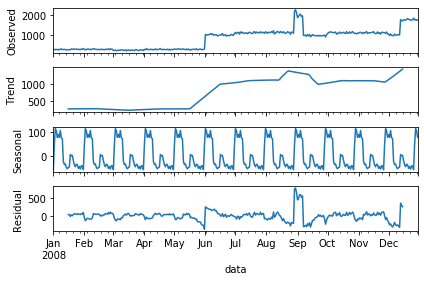

In [765]:
seasonal_decompose(dfv,freq=30).plot()
plt.show()

In [766]:
adf = adfuller(dfv['total_sells'])
print(f'p-value : {adf[1]} < 0.05, portanto a serie não é estacionária')
adf2 = adfuller(dfv['total_sells'].diff().dropna())
print(f'p-value : {adf2[1]} < 0.05, portanto rejeitamos a hipótese de que a serie não é estacionária')
# garantindo a estacionaridade da série

p-value : 0.7718203502396352 < 0.05, portanto a serie não é estacionária
p-value : 7.818378860235548e-13 < 0.05, portanto rejeitamos a hipótese de que a serie não é estacionária


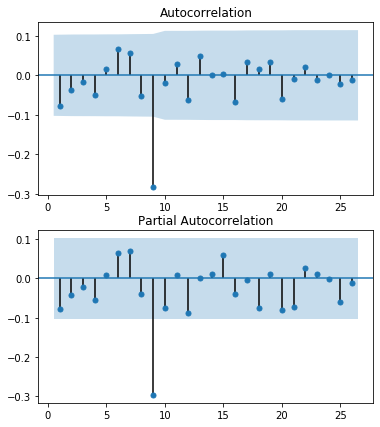

In [767]:
fig,ax= plt.subplots(2,1,figsize=(6,7))
plot_acf(dfv.diff().dropna(),ax=ax[0],zero=False)
plot_pacf(dfv.diff().dropna(),ax=ax[1],zero=False)
plt.show()
# Pelas autocorrelações e decomposição acima, um modelo SARIMA(1,0,0)(0,1,0,30) se encaixaria bem

In [768]:
model = pmd.auto_arima(dfv,start_p=1,max_p=3,
                      start_q=0,max_q=2,start_d=0,max_d=2,
                      seasonal=True,m=30,
                      start_Q=1,max_Q=3,
                      start_P=0,max_P=1,D=1,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True,
                      n_jobs=-1)

Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 1, 30); AIC=4142.586, BIC=4157.843, Fit time=4.500 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 30); AIC=4857.849, BIC=4865.477, Fit time=0.085 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 30); AIC=4220.450, BIC=4235.706, Fit time=3.864 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 30); AIC=4507.400, BIC=4522.657, Fit time=3.374 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 30); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 30); AIC=4887.440, BIC=4891.254, Fit time=0.062 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 0, 30); AIC=4305.957, BIC=4317.400, Fit time=0.566 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 1, 30); AIC=4144.266, BIC=4163.337, Fit time=5.876 seconds
Near non-invertible roots for order (1, 0, 0)(1, 1, 1, 30); setting score to inf (at 

In [769]:
sarimax = SARIMAX(dfv,order=(1,0,0),seasonal_order=(0,1,1,30)).fit()
pred_sarimax = sarimax.get_prediction('2008-12-16','2008-12-30').predicted_mean

In [770]:
dfv.reset_index(inplace=True)
dfv['selled_yesterday'] = dfv['total_sells'].shift().fillna(method='bfill')
x=dfv.drop(['total_sells','data'],axis=1)
y=dfv['total_sells']
xtrain,xtest= np.split(x, [int(.96 *len(x))])
ytrain,ytest= np.split(y, [int(.96 *len(y))])

In [771]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
pred_lr = lr.predict(xtest)

In [772]:
# Model Evaluation
from sklearn.metrics import mean_squared_log_error as msle

In [773]:
def rmsle(a,b):
    return np.sqrt(msle(a,b))*100

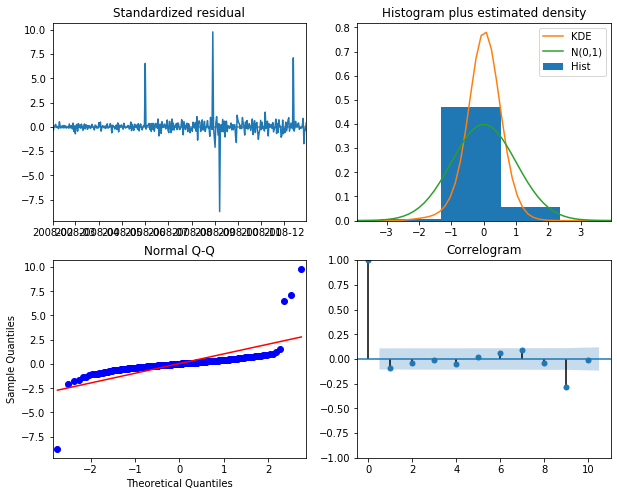

In [774]:
fig=plt.figure(figsize=(10,8))
sarimax.plot_diagnostics(fig=fig)
plt.show()

Text(0.5, 1.0, 'Quantidade de vendas por dia(dezembro)')

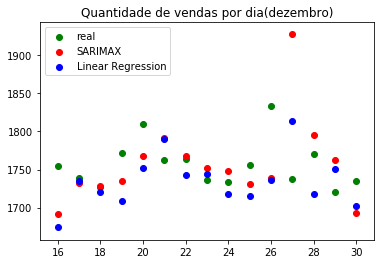

In [775]:
val= dfv.total_sells.iloc[350:]
p1=plt.scatter(range(16,31),val,c='green')
p2=plt.scatter(range(16,31),pred_sarimax,c='red')
p3=plt.scatter(range(16,31),pred_lr,c='blue')
plt.legend([p1,p2,p3],('real','SARIMAX','Linear Regression'))
plt.title('Quantidade de vendas por dia(dezembro)')


Text(0.5, 1.0, 'Quantidade de vendas por dia(dezembro)')

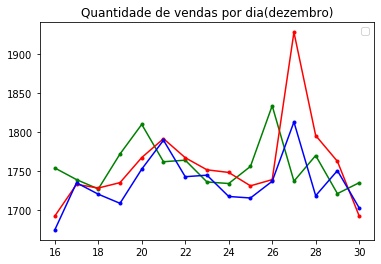

In [776]:
p1 = plt.plot(range(16,31),val,marker='.',color='green')
p2 = plt.plot(range(16,31),pred_sarimax,marker='.',color='red')
p3 = plt.plot(range(16,31),pred_lr,marker='.',color='blue')
plt.legend([p1,p2,p3],('real','SARIMAX','Linear Regression'))
plt.title('Quantidade de vendas por dia(dezembro)')


In [777]:
print('Erro cometido no SARIMAX : '+str(rmsle(val,pred_sarimax))+'%')
print('Erro cometido na Regressão Linear : '+str(rmsle(val,pred_lr))+'%')

Erro cometido no SARIMAX : 3.4726907081990053%
Erro cometido na Regressão Linear : 2.8184644854991543%


In [778]:
dft = pd.DataFrame(data = {'real' : val.values ,'sarimax' : pred_sarimax,'lr' : pred_lr})
dft

,real,sarimax,lr
2008-12-16,1754,1692.143698,1674.337816
2008-12-17,1739,1732.923336,1734.929393
2008-12-18,1727,1728.191552,1720.270141
2008-12-19,1772,1735.140117,1708.542739
2008-12-20,1810,1767.406598,1752.520496
2008-12-21,1762,1791.647814,1789.657269
2008-12-22,1764,1767.191530,1742.747661
2008-12-23,1736,1751.603798,1744.702228
2008-12-24,1734,1748.239303,1717.338290
2008-12-25,1756,1731.037051,1715.383723


Text(0.5, 1.0, 'Previsão de vendas de Laptops')

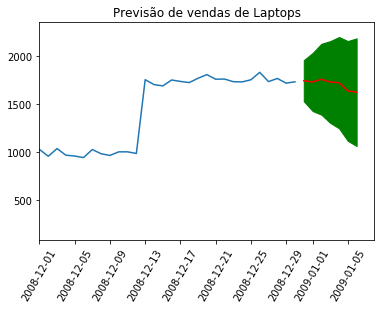

In [808]:
# Previsão de vendas
prev = sarimax.get_forecast(steps=7,dynamic=True)
previsao=prev.predicted_mean
conf_int = prev.conf_int()
cima = conf_int.loc[:,'upper total_sells']
baixo = conf_int.loc[:,'lower total_sells']
plt.plot(dfv['data'],dfv['total_sells'],label='real')
plt.plot(previsao.index,previsao,color='r',label='previsao')
plt.fill_between(baixo.index,baixo,cima,color='green')
plt.xlim('2008-12','2009-01-8')
plt.xticks(rotation=60)
plt.title('Previsão de vendas de Laptops')